In [3]:
# !pip install --upgrade -q kaggle
!mkdir -p /root/.kaggle
!mv kaggle.json /root/.kaggle

In [4]:
! kaggle competitions download -c dogs-vs-cats

  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 34.6MB/s]
 98% 534M/543M [00:11<00:00, 104MB/s] 
100% 543M/543M [00:11<00:00, 48.4MB/s]
 98% 266M/271M [00:13<00:00, 55.4MB/s]
100% 271M/271M [00:13<00:00, 20.4MB/s]


In [5]:
! unzip -q train.zip

In [18]:
import os 
from PIL import Image
import cv2
from tqdm import notebook

In [19]:
images = []
labels = []
for imageName in notebook.tqdm(os.listdir("train")[:12000]):
  image = cv2.imread("train/" + imageName)
  image = cv2.resize(image, (150, 150))
  images.append(image)
  if "dog" in imageName.lower():
    labels.append(1)
  else:
    labels.append(0)

In [20]:
import numpy as np

In [21]:
len(images), len(labels)

(12000, 12000)

In [22]:
images = np.array(images)
labels = np.array(labels)

In [23]:
images.shape, labels.shape

((12000, 150, 150, 3), (12000,))

In [24]:
12000*20/100

2400.0

In [25]:
12000 - 2400

9600

In [26]:
# We will divide our data into 2 parts Example -  100 images in Total
# 1. Training Data   (data used for training)  -   80 images for training
# 2. Test Data       (Always unseen, and used fot testing once training is done) - 20 images for testing 
# 3. Validation Data (After every epoch check accuracy)(validation data generally comes from training dataset) - 10 images


# 100 images - 80 images (70 for training + 10 for validation)    + 20 images (testing data)

In [27]:
import sklearn
from sklearn.model_selection import train_test_split

In [28]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2)

In [12]:
# training set
# x_train - Images used for training 
# y_train - labels for training images 

# testing set 
# x_test - Images used for testing 
# y_test - Labels for testing images 

In [13]:
del images 
del labels

In [14]:
x_train = x_train /255.0
x_test  = x_test  /255.0

In [15]:
x_train.dtype

dtype('float64')

In [16]:
%tensorflow_version 2.x # this step is only for COLAB not for local system

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x # this step is only for COLAB not for local system`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


In [17]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

In [18]:
y_train = to_categorical(y_train)

In [19]:
y_train

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.activations import relu, softmax
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import SGD

In [21]:
model = Sequential()
model.add(Flatten(input_shape=(150, 150, 3)))
model.add(Dense(128, activation=relu))
model.add(Dense(64, activation=relu))
model.add(Dense(2, activation=softmax))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 67500)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               8640128   
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 130       
Total params: 8,648,514
Trainable params: 8,648,514
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.compile(SGD(learning_rate=0.01/2), categorical_crossentropy, ["acc"])

In [24]:
model.fit(x_train, y_train, batch_size=64, epochs=20, validation_split=0.1) #9600 - 960 images will be used for validation 

Epoch 1/20
135/135 [==============================] - 10s 76ms/step - loss: 0.7174 - acc: 0.5351 - val_loss: 0.6824 - val_acc: 0.5146
Epoch 2/20
135/135 [==============================] - 10s 73ms/step - loss: 0.6741 - acc: 0.5763 - val_loss: 0.6586 - val_acc: 0.6250
Epoch 3/20
135/135 [==============================] - 10s 73ms/step - loss: 0.6660 - acc: 0.5931 - val_loss: 0.6520 - val_acc: 0.6167
Epoch 4/20
135/135 [==============================] - 10s 73ms/step - loss: 0.6597 - acc: 0.6038 - val_loss: 0.6450 - val_acc: 0.6406
Epoch 5/20
135/135 [==============================] - 10s 73ms/step - loss: 0.6537 - acc: 0.6084 - val_loss: 0.6541 - val_acc: 0.5979
Epoch 6/20
135/135 [==============================] - 10s 73ms/step - loss: 0.6434 - acc: 0.6325 - val_loss: 0.6490 - val_acc: 0.6271
Epoch 7/20
135/135 [==============================] - 10s 73ms/step - loss: 0.6346 - acc: 0.6366 - val_loss: 0.6494 - val_acc: 0.6438
Epoch 8/20
135/135 [==============================] - 10s 74ms

In [25]:
model.save_weights("catVsdog.h5")

In [28]:
with open("model_json.json", "w") as _file:
  _file.write(model.to_json())

In [39]:
! wget https://ichef.bbci.co.uk/news/976/cpsprodpb/12A9B/production/_111434467_gettyimages-1143489763.jpg

--2020-08-02 15:59:40--  https://ichef.bbci.co.uk/news/976/cpsprodpb/12A9B/production/_111434467_gettyimages-1143489763.jpg
Resolving ichef.bbci.co.uk (ichef.bbci.co.uk)... 23.76.229.223, 2600:1417:76:594::f33, 2600:1417:76:58e::f33
Connecting to ichef.bbci.co.uk (ichef.bbci.co.uk)|23.76.229.223|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50652 (49K) [image/jpeg]
Saving to: ‘_111434467_gettyimages-1143489763.jpg’

_111434467_gettyima 100%[===================>]  49.46K  --.-KB/s    in 0.01s   

2020-08-02 15:59:41 (3.56 MB/s) - ‘_111434467_gettyimages-1143489763.jpg’ saved [50652/50652]



In [40]:
! mv _111434467_gettyimages-1143489763.jpg cat.jpg

In [29]:
test_image = cv2.imread("cat.jpg")
test_image = cv2.resize(test_image, (150, 150))
test_image = test_image/255.0

In [30]:
test_image.shape

(150, 150, 3)

In [31]:
model.input_shape

(None, 150, 150, 3)

In [32]:
test_image = np.expand_dims(test_image, 0)

In [33]:
test_image.shape

(1, 150, 150, 3)

In [34]:
model.predict(test_image)

array([[0.36495638, 0.63504356]], dtype=float32)

In [35]:
np.argmax(model.predict(test_image))

1

In [1]:
#Load a model

In [2]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow.keras import models 

In [3]:
with open("model_json.json", "r") as _file:
  model_json = _file.read()

In [4]:
model_json

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "Flatten", "config": {"name": "flatten", "trainable": true, "batch_input_shape": [null, 150, 150, 3], "dtype": "float32", "data_format": "channels_last"}}, {"class_name": "Dense", "config": {"name": "dense", "trainable": true, "dtype": "float32", "units": 128, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "dtype": "float32", "units": 64, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer"

In [5]:
restore_model = models.model_from_json(model_json)

In [6]:
restore_model.load_weights("catVsdog.h5")

In [7]:
restore_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 67500)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               8640128   
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 130       
Total params: 8,648,514
Trainable params: 8,648,514
Non-trainable params: 0
_________________________________________________________________


In [29]:
x_test = x_test /255.0

In [30]:
x_test.shape

(2400, 150, 150, 3)

In [31]:
y_pred = restore_model.predict(x_test)

In [32]:
y_pred.shape

(2400, 2)

In [33]:
y_pred

array([[0.12122387, 0.87877613],
       [0.9358488 , 0.06415115],
       [0.35123917, 0.64876086],
       ...,
       [0.5213248 , 0.47867528],
       [0.2657568 , 0.7342432 ],
       [0.5700141 , 0.4299859 ]], dtype=float32)

In [36]:
y_pred_ = np.argmax(y_pred, axis=1)

In [34]:
y_test

array([1, 0, 0, ..., 0, 1, 0])

In [40]:
(y_pred_ == y_test).mean()*100

69.29166666666666

In [41]:
np.where(y_pred_ != y_test)

(array([   2,    5,    6,    7,    8,   10,   13,   14,   15,   19,   22,
          24,   30,   31,   33,   34,   37,   38,   47,   48,   49,   52,
          55,   58,   61,   65,   67,   68,   70,   74,   76,   78,   80,
          88,   93,   94,   95,  100,  101,  102,  103,  107,  111,  116,
         121,  123,  139,  142,  143,  144,  148,  149,  167,  170,  171,
         173,  175,  176,  179,  180,  185,  186,  190,  191,  196,  208,
         217,  218,  219,  221,  223,  224,  229,  231,  236,  238,  242,
         248,  250,  251,  257,  259,  260,  266,  267,  268,  269,  270,
         271,  276,  281,  285,  286,  289,  293,  298,  304,  308,  309,
         310,  311,  320,  325,  326,  328,  330,  331,  335,  339,  341,
         348,  353,  363,  365,  367,  371,  375,  376,  377,  382,  384,
         385,  389,  394,  397,  404,  406,  408,  410,  412,  416,  424,
         425,  433,  434,  437,  445,  451,  453,  459,  461,  463,  473,
         474,  475,  478,  483,  487, 

In [43]:
import matplotlib.pyplot as plt


Model thinks it is CAT but actually it is DOG


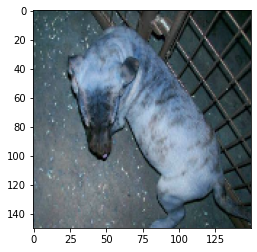

In [46]:
num = 2261 
map_dict = {1: "DOG", 0: "CAT"}
plt.imshow(x_test[num])
print(f"Model thinks it is {map_dict.get(y_pred_[num])} but actually it is {map_dict.get(y_test[num])}")

In [49]:
not_good_index = np.where(y_pred_ != y_test)

In [50]:
y_test[not_good_index]

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,

In [47]:
from sklearn.metrics import confusion_matrix

In [48]:
confusion_matrix(y_test, y_pred_)

array([[834, 379],
       [358, 829]])

In [51]:
# Increase Model accuracy - CNN 

In [52]:
# RAM Issue - CNN, Image Data Generator